# **Workshop 9: Data Exploration and Visualization (Multivariate Visualization)**
**คำสั่ง**

1.   ศึกษาวิธีการแสดงภาพข้อมูลเบื้องต้น สำหรับข้อมูลหลายมิติ
2.   ทำโจทย์ปฏิบัติการแต่ละข้อตามคำสั่ง
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_09_XXXXXXXXX.ipynb โดย XXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_09_650510714.ipynb ที่เว็บไซต์ https://mango-cmu.instructure.com/courses/6152/assignments/61247

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy import stats

In [ ]:
# load lris
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

**Scatterplot**

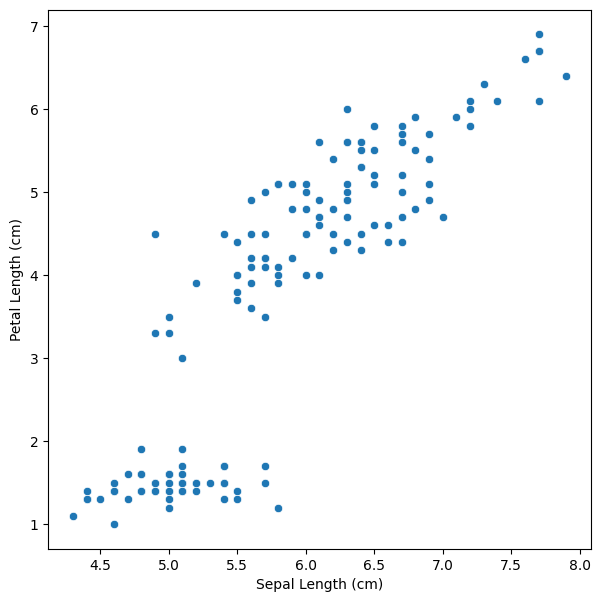

In [ ]:
# Plot the data in 2D feature space
plt.figure(figsize=(7, 7))
fig = sns.scatterplot(data=iris, x='sepal_length', y='petal_length')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show(fig)

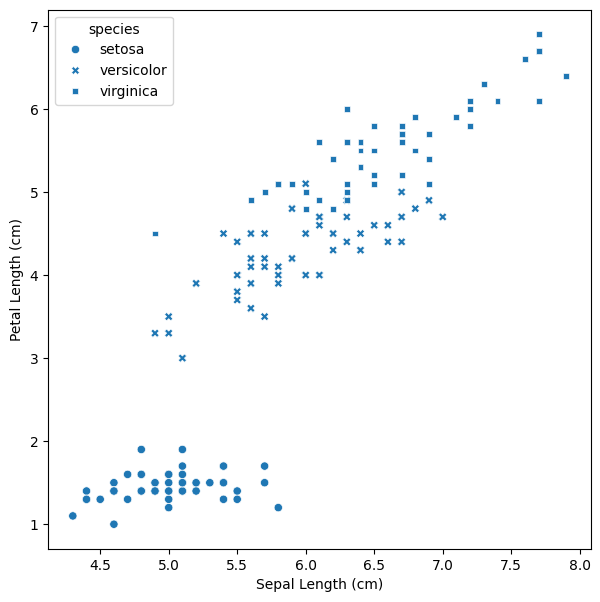

In [ ]:
# Plot the data in 2D feature space with a categotical data
plt.figure(figsize=(7, 7))
fig = sns.scatterplot(data=iris, x='sepal_length', y='petal_length', style="species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show(fig)

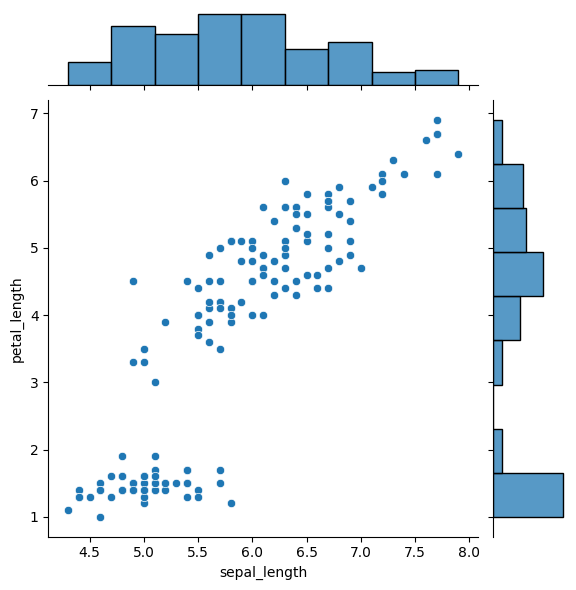

In [ ]:
# joint plot (scatterplot+histogram)
fig = sns.jointplot(data=iris, x='sepal_length', y='petal_length')
plt.show(fig)

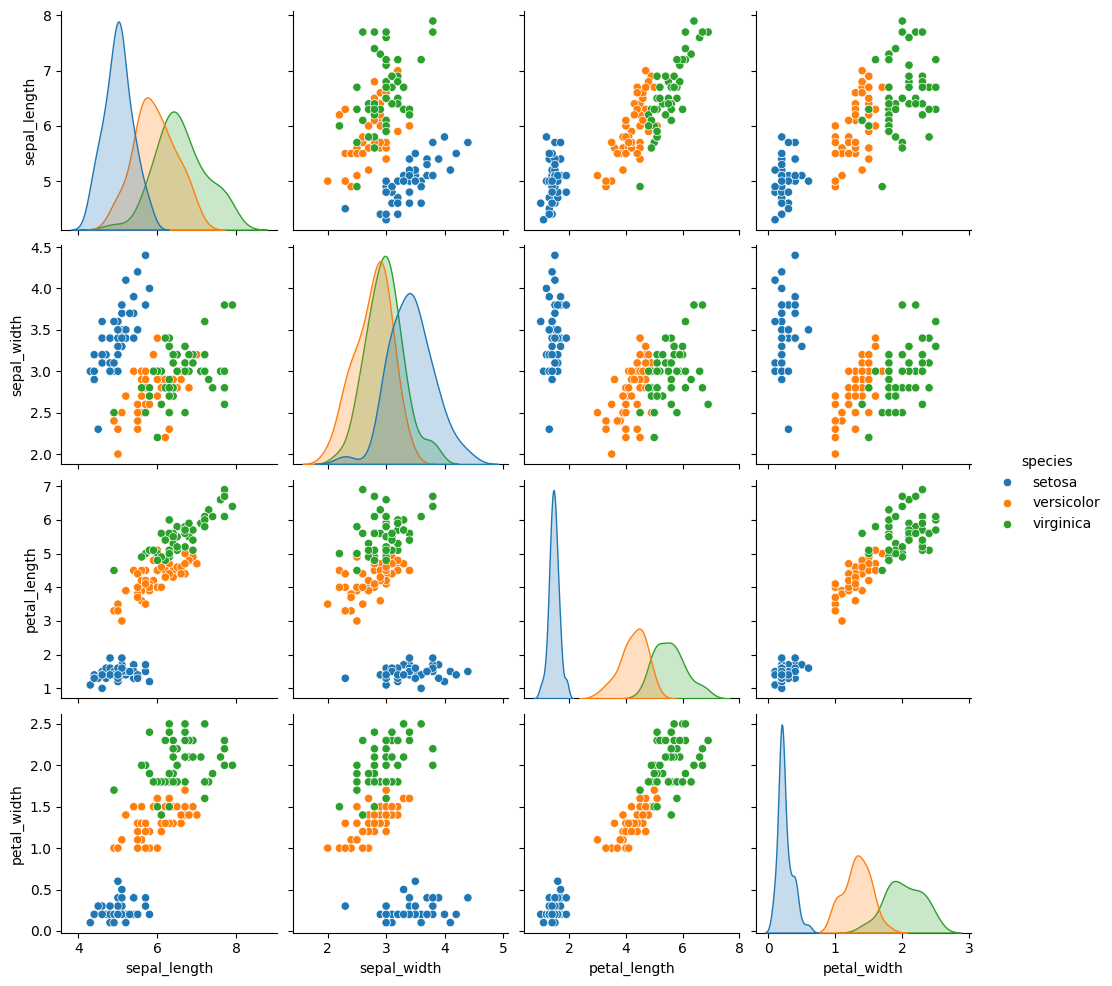

In [ ]:
# Scatterplot matrix
fig = sns.pairplot(data=iris, hue='species')
plt.show(fig)

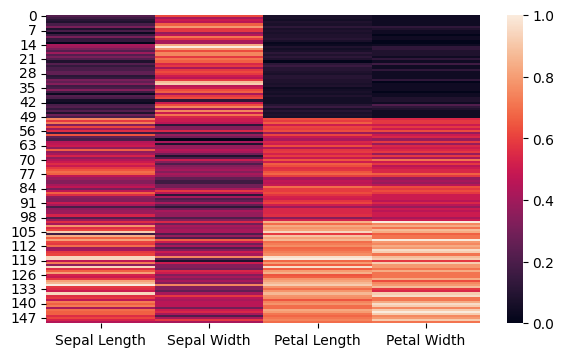

In [9]:
# Heatmap
plt.figure(figsize=(7, 4))
# First, normalize the data
irist_tmp = iris.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]
irist_tmp['sepal_length'] = (irist_tmp['sepal_length']-irist_tmp['sepal_length'].min())/(irist_tmp['sepal_length'].max()-irist_tmp['sepal_length'].min())
irist_tmp['sepal_width'] = (irist_tmp['sepal_width']-irist_tmp['sepal_width'].min())/(irist_tmp['sepal_width'].max()-irist_tmp['sepal_width'].min())
irist_tmp['petal_length'] = (irist_tmp['petal_length']-irist_tmp['petal_length'].min())/(irist_tmp['petal_length'].max()-irist_tmp['petal_length'].min())
irist_tmp['petal_width'] = (irist_tmp['petal_width']-irist_tmp['petal_width'].min())/(irist_tmp['petal_width'].max()-irist_tmp['petal_width'].min())

# Then, plot a heatmap
fig = sns.heatmap(data=irist_tmp,xticklabels=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
plt.show(fig)

In [10]:
# load penguins dataset
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [11]:
penguins.shape

(344, 7)

In [12]:
penguins["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [13]:
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

ปฏิบัติการข้อ 1) จงแสดงความสัมพันธ์ระหว่างตัวแปรเชิงตัวเลขแต่ละคู่ในชุดข้อมูล penguins

<Figure size 700x400 with 0 Axes>

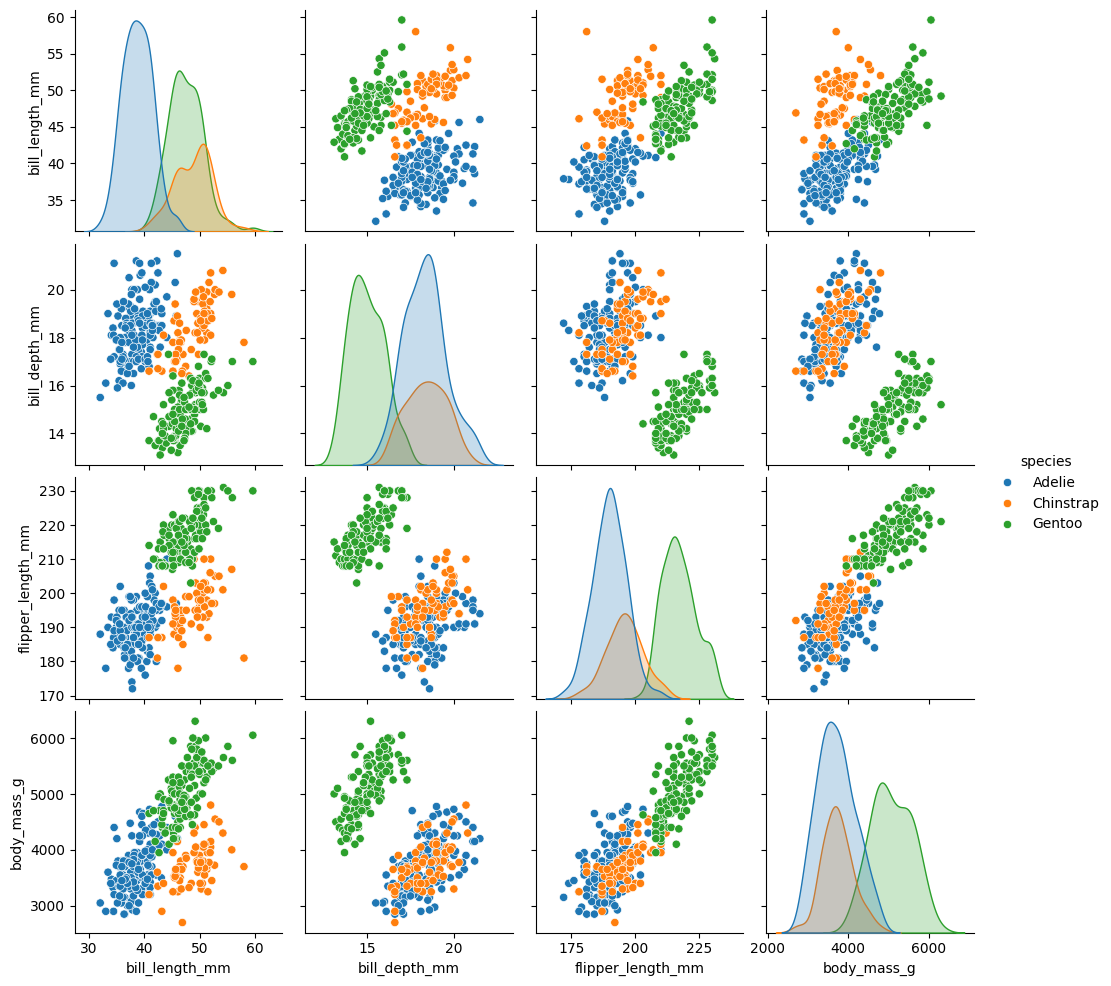

In [19]:
# Answer here!
# Relationship between each pair of numerical feature
plt.figure(figsize=(7, 4))
fig = sns.pairplot(data=penguins, hue="species")
plt.show(fig)

ปฏิบัติการข้อ 2) จงแสดงภาพข้อมูลเพื่อหาคำตอบว่า ตัวแปร bill_length_mm	และ bill_depth_mm สามารถใช้ในการจำแนก species เพนกวิ้นได้หรือไม่

Text(0, 0.5, 'Bill Depth (mm)')

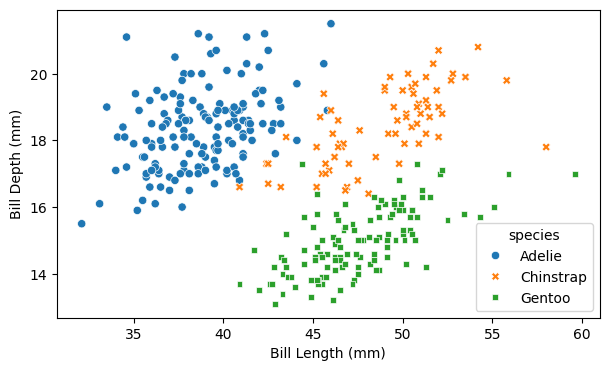

In [25]:
# Answer here!
# Relationship between bill_length_mm and bill_depth_mm
plt.figure(figsize=(7, 4))
fig = sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', style="species", hue="species")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")

**จากการแสดง Scatter plot พบว่าสามารถใช้ Feature bill_length_mm และ bill_depth_mm ในการจำแนก species ของเพนกวิ้นได้**

ปฏิบัติการข้อ 3) จงแสดงภาพข้อมูลเพื่อแสดงให้เห็นว่าเพนกวิ้นที่อาศัยอยู่ในแต่ละเกาะ มีคุณลักษณ์ใดที่เหมือนหรือแตกต่างกันบ้าง

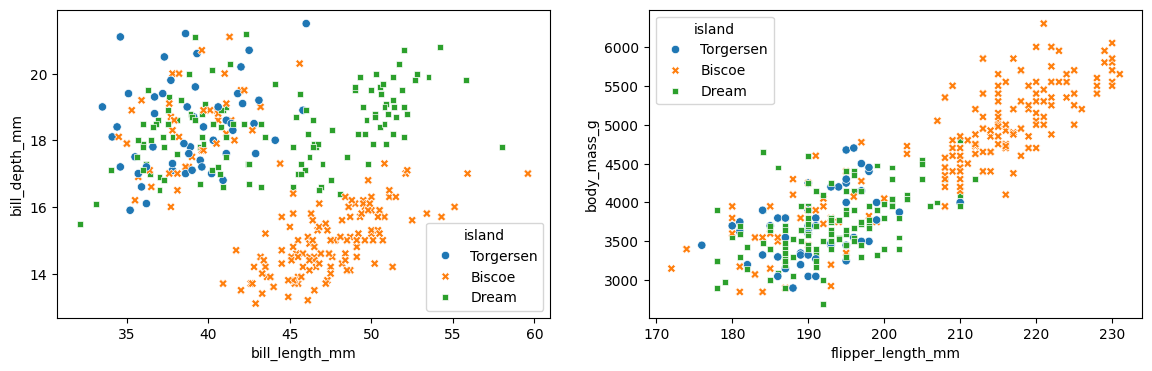

In [26]:
# Answer here!
# Similarities of Penguin on each island
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
fig = sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', style="island", hue="island")

plt.subplot(1, 2, 2)
fig = sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', style="island", hue="island")

plt.show(fig)

**เกาะ Torgersen - มีคุณลักษณะทั้ง 4 คล้ายกับเกาะ Dream โดยเมื่อเทียบกับเพนกวิ้นบนเกาะ Biscoe แล้ว พบว่าเพนกวิ้นบนเกาะนี้จะมีความลึกของปากมากกว่า แต่จะมีความยาวปีกและมวลร่างกายของเพนกวิ้นที่น้อยกว่าเพนกวิ้นที่อาศัยอยู่บนเกาะ Biscoe**

**เกาะ Biscoe - มีคุณลักษณะทั้ง 4 คุณลักษณะซึ่งแตกต่างจากอีกเกาะทั้งสอง คือ ปากเพนกวิ้นจะมีความยาวกว่า แต่จะมีความลึกของปากน้อยกว่า ปีกจะมีความยาวกว่า และมวลร่างกายของเพนกวิ้นจะเยอะกว่า**

**เกาะ Dream - มีคุณลักษณะทั้ง 4 เหมือนกับเกาะ Torgersen ยกเว้นที่ความยาวของปากเพนกวิ้นบนเกาะ Dream จะยาวมากกว่าบนเกาะ Torgersen**

**Determine the data distribution using Q-Q plot**

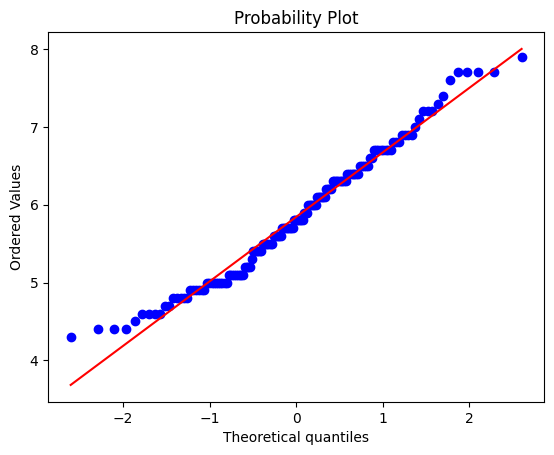

In [27]:
# QQ plot using scipy
# See detail: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

res = stats.probplot(iris['sepal_length'], dist=stats.norm, plot=plt)

ปฏิบัติการข้อ 4) จงตรวจสอบว่าค่าตัวแปร bill_length_mm ในชุดข้อมูล penguins มีลักษณะการกระจายแบบปรกติหรือไม่





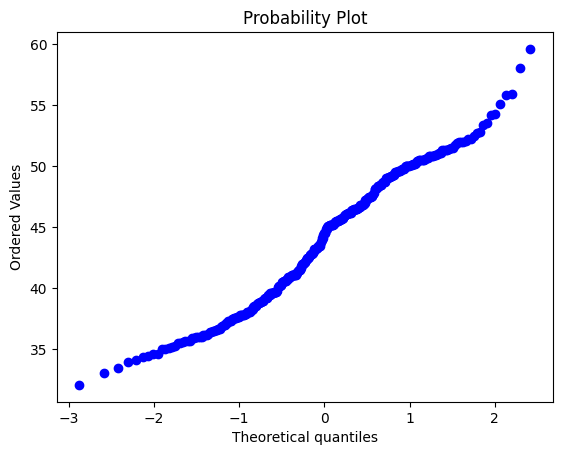

In [28]:
# Answer here!
dist = stats.probplot(penguins['bill_length_mm'], dist=stats.norm, plot=plt)

**จากการแสดง Data distribution ด้วย Q-Q plot พบว่าข้อมูลใน Feature bill_length_mm มีการกระจายโดยไม่ได้อยู่บนเส้นตรง จึงสรุปได้ว่าตัวแปรดังกล่าวไม่มีลักษณะการกระจายแบบปรกติ**

**Visualization for categorical data**

In [29]:
# load tips dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
tips.shape

(244, 7)

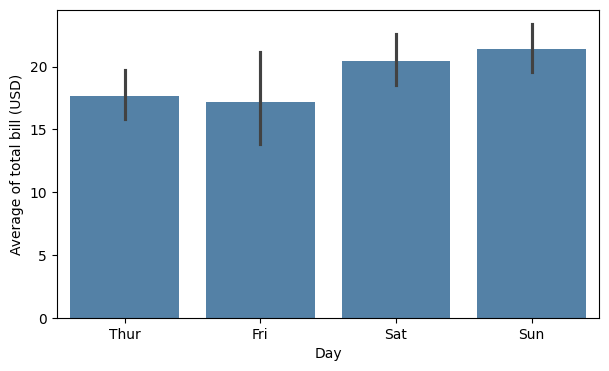

In [32]:
# bar plot
plt.figure(figsize=(7, 4))
fig = sns.barplot(data=tips, x="day", y="total_bill", color='steelblue')
plt.xlabel("Day")
plt.ylabel("Average of total bill (USD)")
plt.show(fig)

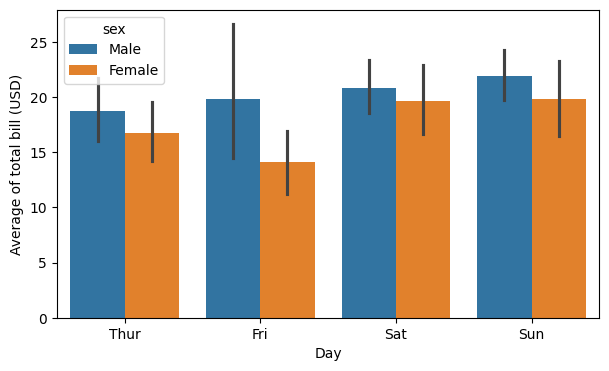

In [33]:
# clusted bar plot
plt.figure(figsize=(7, 4))
fig = sns.barplot(data=tips, x="day", y="total_bill", hue="sex")
plt.xlabel("Day")
plt.ylabel("Average of total bill (USD)")
plt.show(fig)

<ipython-input-34-e51972d734fe>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = tips.groupby('day')['total_bill'].sum().reset_index()
<ipython-input-34-e51972d734fe>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2 = sns.barplot(x="day", y="total_bill", data=male, estimator=sum, ci=None,  color='steelblue', label='Male')


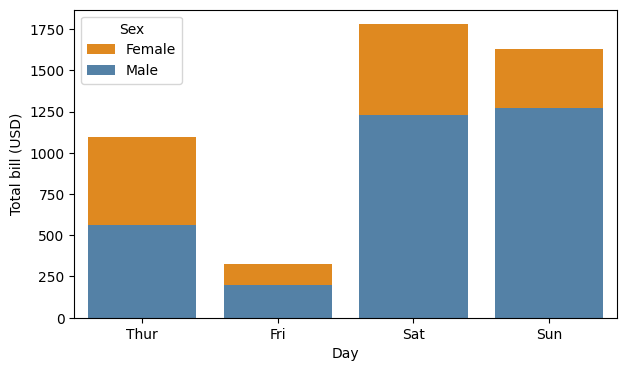

In [34]:
# Stacked Barplot
plt.figure(figsize=(7, 4))
total = tips.groupby('day')['total_bill'].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkorange', label='Female')

# bottom bar ->  take only smoker=Yes values from the data
male = tips[tips.sex=='Male']

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=male, estimator=sum, ci=None,  color='steelblue', label='Male')

# add legend
#top_bar = mpatches.Patch(color='darkorange', label='Female')
#bottom_bar = mpatches.Patch(color='steelblue', label='Male')
plt.legend(title="Sex")

plt.xlabel("Day")
plt.ylabel("Total bill (USD)")

# show the graph
plt.show()


<ipython-input-35-0672a35f3d41>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = tips.groupby('day')['total_bill'].sum().reset_index()
<ipython-input-35-0672a35f3d41>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male = tips[tips.sex=='Male'].groupby('day')['total_bill'].sum().reset_index()


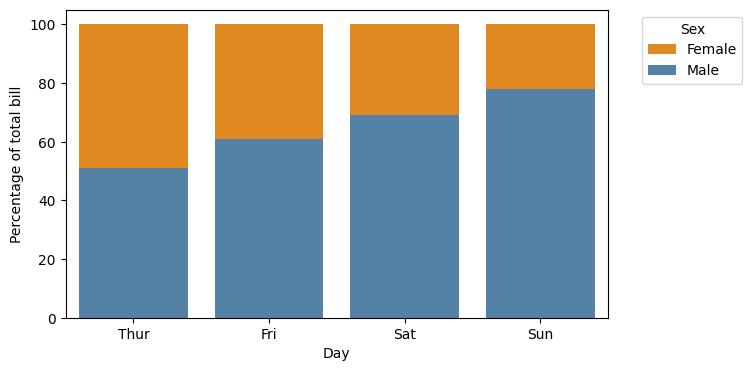

In [35]:
# Percent Stacked Bar Chart
plt.figure(figsize=(7, 4))

total = tips.groupby('day')['total_bill'].sum().reset_index()
male = tips[tips.sex=='Male'].groupby('day')['total_bill'].sum().reset_index()

male['total_bill'] = [i / j * 100 for i,j in zip(male['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkorange', label='Female')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=male, color='steelblue', label='Male')

# add legend
plt.legend(title='Sex',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Day")
plt.ylabel("Percentage of total bill")

# show the graph
plt.show()

ปฏิบัติการข้อ 5) จงเปรียบเทียบค่าเฉลี่ยตัวแปร body_mass_g ในชุดข้อมูล penguins สำหรับเพนกวิ้นแต่ละสายพันธุ์





Text(0, 0.5, 'Average of body mass (g)')

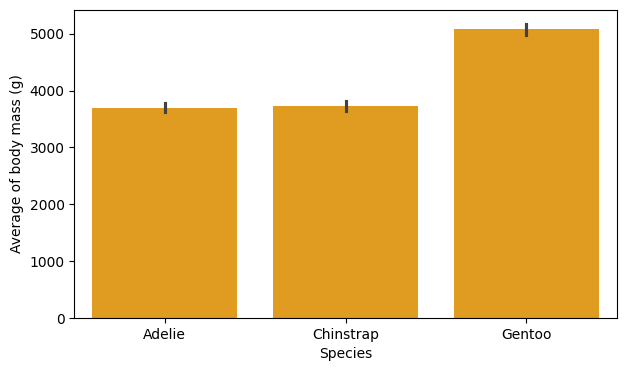

In [47]:
# Answer here!
plt.figure(figsize=(7, 4))
fig = sns.barplot(data=penguins, x="species", y="body_mass_g", color='orange')
plt.xlabel("Species")
plt.ylabel("Average of body mass (g)")

ปฏิบัติการข้อ 6) จงเปรียบเทียบค่าเฉลี่ยตัวแปร body_mass_g ในชุดข้อมูล penguins สำหรับเพนกวิ้นแต่ละเพศและสายพันธุ์

Text(0, 0.5, 'Average of body mass (g)')

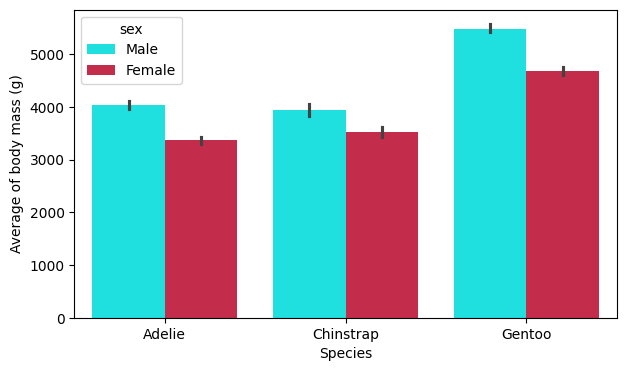

In [50]:
# Answer here!
plt.figure(figsize=(7, 4))
fig = sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", palette = ['aqua', 'crimson'])
plt.xlabel("Species")
plt.ylabel("Average of body mass (g)")

ปฏิบัติการข้อ 7) จงเปรียบเทียบสัดส่วนจำนวนเพนกวิ้นเพศผู้และเพศเมีย ที่อาศัยอยู่ในแต่ละเกาะ

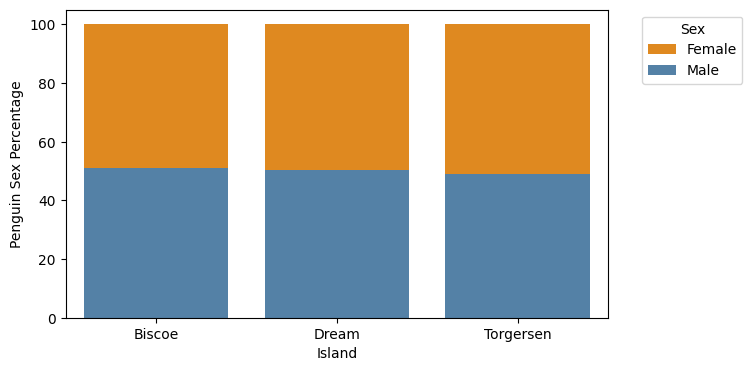

In [65]:
# Answer here!
plt.figure(figsize=(7, 4))

# รวมข้อมูลของ Feature island กับ sex แล้วนับจำนวนเพนกวิ้นในแต่ละกลุ่ม
total = penguins.groupby(['island'])['sex'].count().reset_index()
male = penguins[penguins.sex=='Male'].groupby(['island'])['sex'].count().reset_index()
# หาเปอร์เซ็นต์จาก จำนวนของเพนกวิ้นเพศผู้ในแต่ละเกาะ/จำนวนเพนกวิ้นทั้งหมดในแต่ละเกาะ
male['sex'] = [i / j * 100 for i,j in zip(male['sex'], total['sex'])]
total['sex'] = [i / j * 100 for i,j in zip(total['sex'], total['sex'])]

# Plot Percent Stacked Bar Chart
bar1 = sns.barplot(x="island",  y="sex", data=total, color='darkorange', label='Female')
bar2 = sns.barplot(x="island", y="sex", data=male, color='steelblue', label='Male')
plt.legend(title='Sex',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Island")
plt.ylabel("Penguin Sex Percentage")
plt.show()